## Bibliotecas/módulos

In [2]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import cm

import numpy as np
import csv

#from matplotlib import rcParams
#rcParams['text.usetex'] = True
#rcParams['text.latex.preamble'] = r'\usepackage{amsmath}'

from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

## Função para avaliação do modelo

In [3]:
def medidaAvaliaModelo(x,y,d,q,r):
    
    pol = PolynomialFeatures(d)
    regLin = linear_model.LinearRegression()
    sGeral = 0

    for perc in np.linspace(0.1,0.9,q):
        vec = []
        for _ in range(r):
            xD, xI, yD, yI = train_test_split(x,y,test_size=perc)

            polXD = pol.fit_transform(xD)
            polXI = pol.fit_transform(xI)

            regLin.fit(polXD,yD)
            estYI = regLin.predict(polXI)

            vec.append( np.sum( (estYI - yI)**2 )/len(yI) )
        sGeral += np.mean(vec)
        #sGeral += np.median(vec)
        
    return sGeral

## Dados simulados segundo a função:
$f(x) = x \cdot (\cos(x) + 1) + \zeta; \ \ \zeta \sim \mathcal{N}(0,1)$

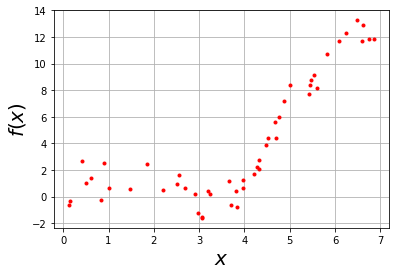

In [4]:
np.random.seed(0)
x = np.random.uniform(0,7,50).reshape(-1,1)
y = x + np.cos(x)*x + np.random.normal(0,1,len(x)).reshape(-1,1)

plt.plot(x,y,'r.')
plt.xlabel(r'$x$',fontsize=20)
plt.ylabel(r'$f(x)$',fontsize=20)
plt.grid()

## Processo de avaliação/seleção

In [5]:
ds = [1,2,3,4,5,6,7,8,9]
vec = []
for i in ds:
    #vec.append( medidaAvaliaModelo(x,y,i,10,100) )
    vec.append( np.log10( medidaAvaliaModelo(x,y,i,10,100) ) )
    print('Grau: ',i,' -- SEQ Mediano: ',vec[-1])

Grau:  1  -- SEQ Mediano:  1.9783123039221033
Grau:  2  -- SEQ Mediano:  1.7289120439724104
Grau:  3  -- SEQ Mediano:  2.9329419719136736
Grau:  4  -- SEQ Mediano:  7.2425216597738284
Grau:  5  -- SEQ Mediano:  7.767054983913386
Grau:  6  -- SEQ Mediano:  6.4979320900247695
Grau:  7  -- SEQ Mediano:  9.607593262440863
Grau:  8  -- SEQ Mediano:  13.155027328227368
Grau:  9  -- SEQ Mediano:  10.558837333518037


## Visualização...

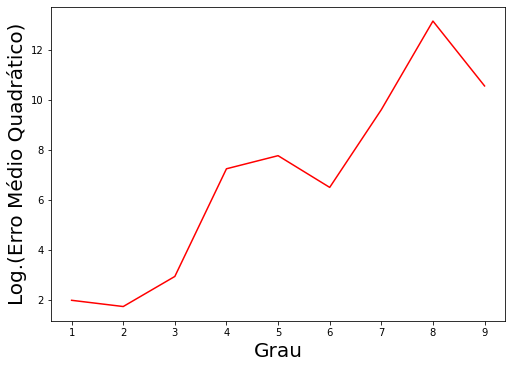

In [6]:
FS = (7,5) #Tamanho da figura a ser gerada
fig = plt.figure(constrained_layout=True,figsize=FS)
spec = gridspec.GridSpec(ncols=1, nrows=1, figure=fig)

ax = fig.add_subplot(spec[0, 0])

ax.plot(ds,vec,'r-')
ax.set_xlabel('Grau',fontsize=20)
ax.set_ylabel('Log.(Erro Médio Quadrático)',fontsize=20)
#ax.set_yscale('logit')
#ax.set_ylim([np.min(vec),np.min(vec)*50])

plt.show()